# Latent Diritchet Allocation

---

## Topic Modeling - Unsupervised Learning

Leer documentos no etiquetados y obtener un listado de posibles tópicos de manera no supervisada

In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore
import nltk
import numpy as np
import spacy
from document import Document
import pandas as pd
import util.log as log
log.init_logger()
from util.data_cleaning import preprocess
from util.graphics.word_cloud import show_word_cloud

In [9]:
dataframe = pd.read_csv('data.csv')
preprocessed_docs = dataframe['string'].map(preprocess)

In [10]:
id2token = gensim.corpora.Dictionary(preprocessed_docs)

In [11]:
id2token.filter_extremes(no_below=5, no_above=0.5)
bag_of_words = [id2token.doc2bow(doc) for doc in preprocessed_docs]
bag_of_words_tf_dif = TfidfModel(bag_of_words)[bag_of_words]

In [12]:
lda_model = LdaMulticore(bag_of_words_tf_dif, num_topics=14, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [13]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.006*"paseo" + 0.004*"parque" + 0.004*"disfrute" + 0.003*"keller" + 0.003*"segel" + 0.003*"visitante" + 0.003*"118319-9" + 0.003*"claudiolegajo" + 0.003*"alejandroayudantes" + 0.003*"economía1er"

Topic: 1
Words: 0.007*"negocio" + 0.007*"preguntar" + 0.006*"ciento" + 0.005*"variedad" + 0.005*"atraer" + 0.004*"estrategia" + 0.004*"desear" + 0.004*"industria" + 0.004*"claro" + 0.004*"video"

Topic: 2
Words: 0.024*"energía" + 0.022*"rifkin" + 0.019*"revolución" + 0.019*"procomún" + 0.013*"industrial" + 0.011*"infraestructura" + 0.009*"marginal" + 0.008*"termodinámica" + 0.007*"factura" + 0.007*"entrópico"

Topic: 3
Words: 0.015*"2018" + 0.012*"e-commerce" + 0.009*"comprador" + 0.008*"argentina" + 0.008*"venta" + 0.007*"unidos" + 0.007*"dólar" + 0.007*"e-marketing" + 0.007*"2008" + 0.007*"electrónico"

Topic: 4
Words: 0.008*"5071" + 0.008*"machine" + 0.007*"learning" + 0.007*"2016" + 0.007*"choren" + 0.007*"david" + 0.006*"negocio" + 0.006*"centralizado" + 0.006*"inteligen

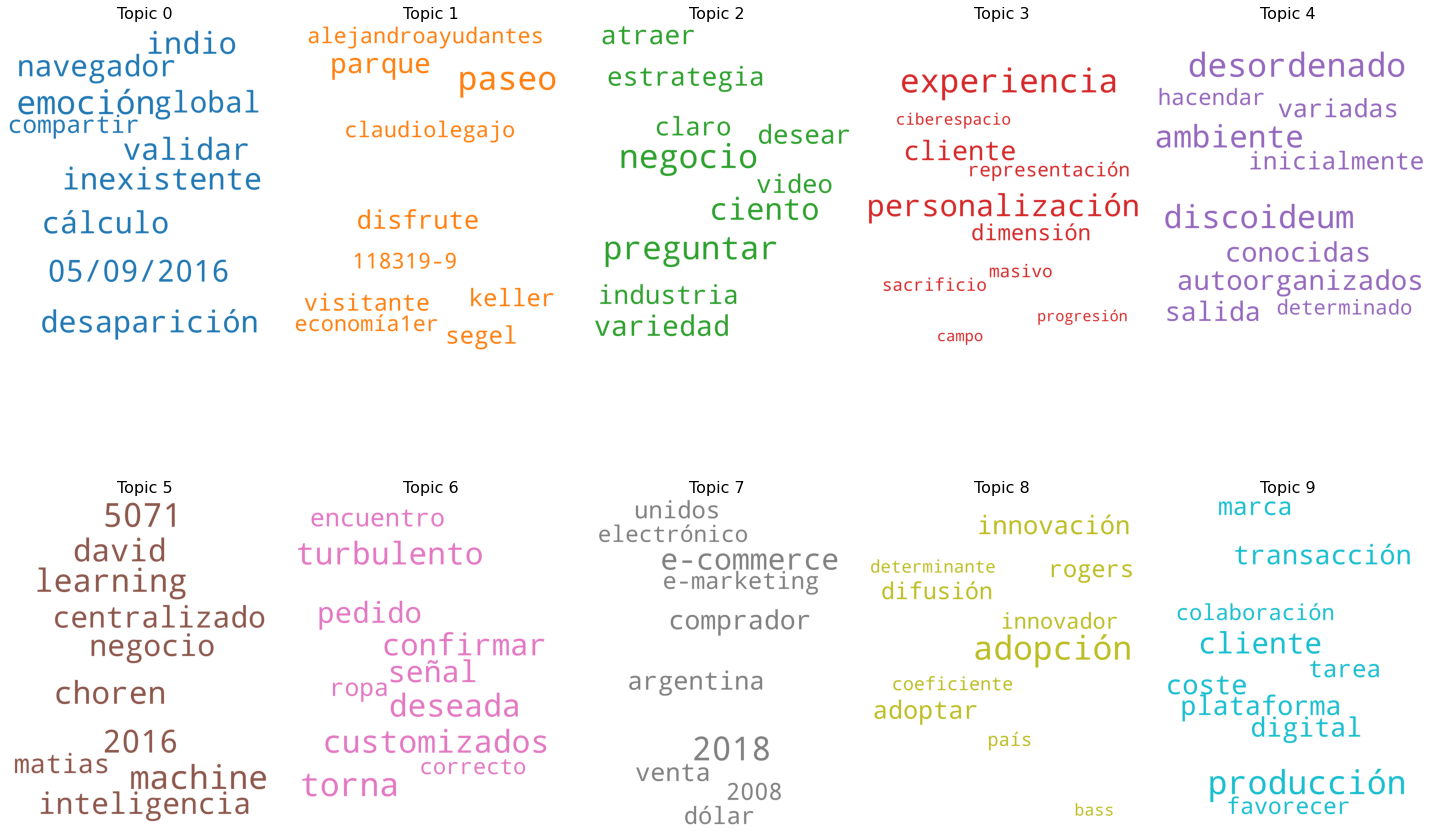

In [14]:
show_word_cloud(lda_model, rows = 2, columns = 5)

In [ ]:
def get_topic(model, bow):
    possible_topics = lda_model[bag]
    max = 0
    pmax = 0

    for topic, probability in possible_topics:
        if probability > pmax:
            max = topic
            pmax = probability

    return max 

In [ ]:
topic_counts = np.zeros(len(lda_model.print_topics()))

for bag in bag_of_words_tf_dif:
    topic_counts[get_topic(lda_model, bag)] += 1

for ix, topic in enumerate(topic_counts):
    print('Topic #{}: {}'.format(ix, topic))




In [ ]:
dataframe['topic0'][0]

In [ ]:
for i in range(len(dataframe)):
    
    text = preprocess(dataframe.string[i])
    bag_of_words = dictionary.doc2bow(text)

    topics = lda_model[bag_of_words]

    max_top, max_prob = 0, 0

    for topic, probability in topics:
        dataframe['topic{}'.format(topic)][i] = probability
        if probability > max_prob:
            max_top = topic
            max_prob = probability
    dataframe.topic[i] = max_top


dataframe

In [ ]:
dataframe.loc[:]

In [ ]:
dataframe.groupby('topic').size()

In [ ]:
lda_model.show_topics(num_topics=14)

In [ ]:
from util.data_cleaning import lemmatize
lemmatize('clienta')